<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/CNN_cifar_10_augmentation_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10
from keras.preprocessing import image

In [ ]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Img_Size = 32

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
# Y_test

In [ ]:
Y_test = Y_test.ravel()
Y_train = Y_train.ravel()

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)



# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=80))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [ ]:
print(Y_train.shape)
print(X_train.shape)

(50000, 10)
(50000, 32, 32, 3)


In [ ]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
#r = model.fit(X_train, Y_train, epochs=15, batch_size=32)
r = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), batch_size=10, epochs=50)

Epoch 1/50
5000/5000 [==============================] - 35s 4ms/step - loss: 1.6701 - accuracy: 0.3958 - val_loss: 1.3618 - val_accuracy: 0.5171
Epoch 2/50
5000/5000 [==============================] - 18s 4ms/step - loss: 1.1446 - accuracy: 0.5994 - val_loss: 1.4709 - val_accuracy: 0.5430
Epoch 3/50
5000/5000 [==============================] - 19s 4ms/step - loss: 0.9832 - accuracy: 0.6560 - val_loss: 0.8407 - val_accuracy: 0.7066
Epoch 4/50
5000/5000 [==============================] - 18s 4ms/step - loss: 0.8905 - accuracy: 0.6889 - val_loss: 0.9166 - val_accuracy: 0.6847
Epoch 5/50
5000/5000 [==============================] - 18s 4ms/step - loss: 0.8075 - accuracy: 0.7219 - val_loss: 0.9265 - val_accuracy: 0.6832
Epoch 6/50
5000/5000 [==============================] - 18s 4ms/step - loss: 0.7446 - accuracy: 0.7439 - val_loss: 0.8835 - val_accuracy: 0.6955
Epoch 7/50
5000/5000 [==============================] - 19s 4ms/step - loss: 0.6982 - accuracy: 0.7592 - val_loss: 0.8216 - val_ac

C

In [ ]:

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


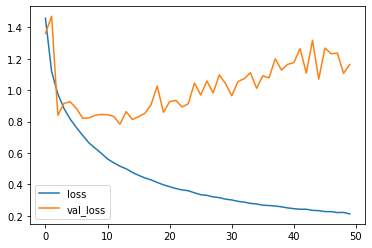

In [ ]:

# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


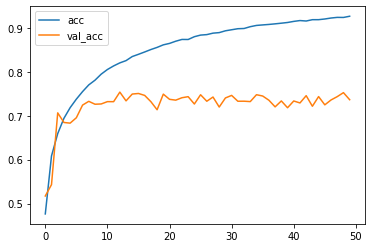

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.9191 - accuracy: 0.7065 - val_loss: 0.8545 - val_accuracy: 0.7359
Epoch 2/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.8208 - accuracy: 0.7269 - val_loss: 0.9195 - val_accuracy: 0.7119
Epoch 3/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.7753 - accuracy: 0.7382 - val_loss: 0.7879 - val_accuracy: 0.7489
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7446 - accuracy: 0.7506 - val_loss: 0.7210 - val_accuracy: 0.7619
Epoch 5/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7247 - accuracy: 0.7547 - val_loss: 0.6966 - val_accuracy: 0.7718
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7020 - accuracy: 0.7620 - val_loss: 0.6790 - val_accuracy: 0.7732
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6872 - accuracy: 0.7669 - val_loss: 0.6329 -

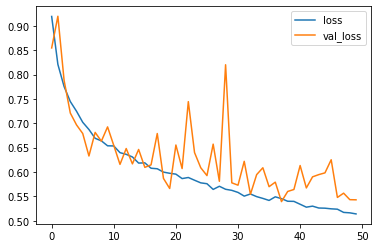

In [ ]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


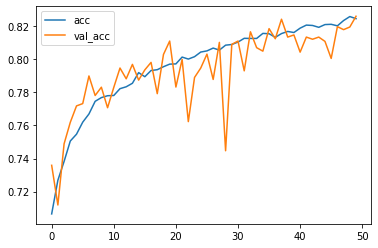

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
ynew = model.predict_classes(X_test)
print(ynew)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3 8 8 ... 5 1 7]


In [ ]:
N_test = len(ynew)

In [ ]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")
#print(y_resp)

In [ ]:
# model.predict(X_test)

In [ ]:
# (model.predict(X_test)[0] > 0.5).astype("int32")

In [ ]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
print(y_class)
y_true = y_class.copy()

[3 8 8 ... 5 1 7]


In [ ]:
#Y_test[-2,:]

In [ ]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [ ]:
#target_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.88      0.61      1000
           1       0.94      0.90      0.92      1000
           2       0.88      0.67      0.76      1000
           3       0.76      0.59      0.67      1000
           4       0.88      0.76      0.81      1000
           5       0.82      0.70      0.76      1000
           6       0.83      0.90      0.86      1000
           7       0.93      0.81      0.86      1000
           8       0.92      0.88      0.90      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.83      0.80      0.80     10000
weighted avg       0.83      0.80      0.80     10000

